<a href="https://colab.research.google.com/github/Keskinksn/yolov9/blob/main/Yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv9 on a Custom Dataset


[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

<br>

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov9-benchmark.jpeg)

**Figure 1.**  Comparisons of the real-time object detecors on MS
COCO dataset. The GELAN and PGI-based object detection
method surpassed all previous train-from-scratch methods in terms
of object detection performance. Source: "YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information"

In [1]:
!git clone https://github.com/WongKinYiu/yolov9.git

fatal: destination path 'yolov9' already exists and is not an empty directory.
/bin/bash: line 1: cd: yolov9: Not a directory


In [2]:
# This line imports the necessary YOLOv9 object detection library. Make sure you have this library installed correctly.
import yolov9

In [3]:
# Loads a pretrained YOLOv9 model from the file "yolov9-c.pt". The device="cpu" argument ensures that the model runs on the CPU, even if you have a GPU available.
model = yolov9.load(
    "yolov9-c.pt",
    device="cpu",
)

YOLOv5 🚀 2024-2-24 Python-3.10.12 torch-2.1.0+cu121 CPU



requirements: /usr/local/lib/python3.10/dist-packages/yolov9/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 724 layers, 51141120 parameters, 0 gradients, 238.7 GFLOPs
Adding AutoShape... 


In [10]:
# Sets the confidence threshold for Non-Maximum Suppression (NMS). NMS eliminates redundant detection boxes. Objects with a confidence score below 0.25 will be discarded.
model.conf = 0.20

In [11]:
# Sets the Intersection over Union (IoU) threshold for NMS. If multiple bounding boxes overlap with an IoU greater than 0.45, the one with the lower confidence score is suppressed.
model.iou = 0.45

In [12]:
# Indicates that the model will detect all classes it was trained on. If you want to filter for specific classes, provide a list of class indices or labels here.
model.classes = None

In [13]:
# Sets the path to the input image.
imgs = "/content/data/this_is_us.jpeg"

# Performs object detection on the image. The results variable will hold the detection information.
results = model(imgs)

# Performs inference with a larger input image size of 1000 pixels. This can improve accuracy, especially for detecting smaller objects, but increases computational time.
results = model(imgs, size=1000)


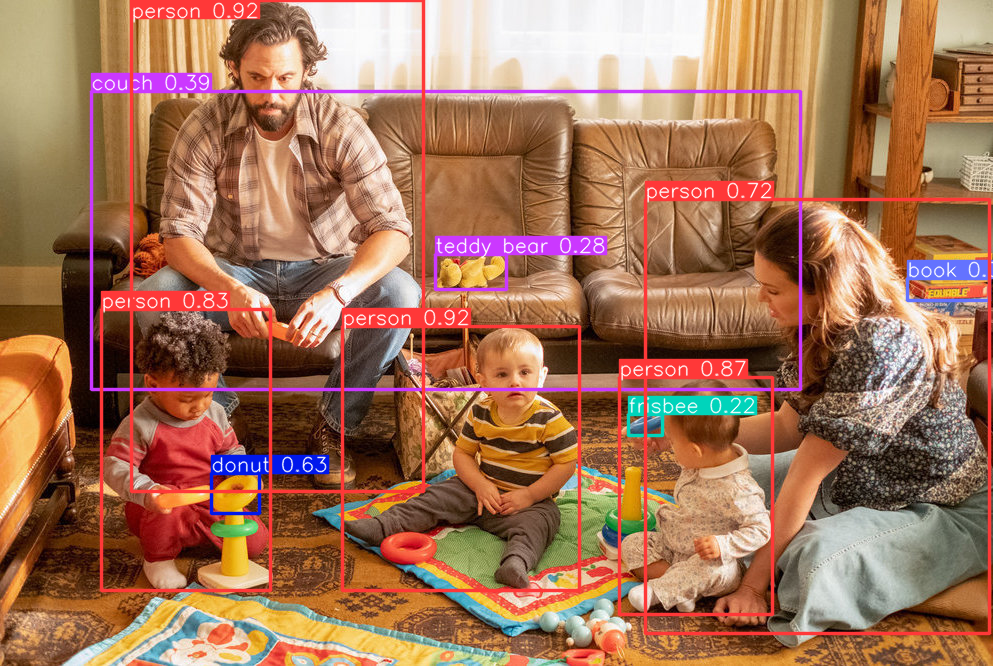

In [14]:
# parse results
predictions = results.pred[0]  # Extracts the raw predictions for the first image in the batch (if you had multiple images).
boxes = predictions[:, :4]  # Slices the prediction data to obtain bounding box coordinates (x1, y1, x2, y2).
scores = predictions[:, 4]  # Extracts the confidence scores for each detected object.
categories = predictions[:, 5]  # Extracts the class indices of the detected objects.

# Displays the original image with detected objects marked by bounding boxes.
results.show()